<a href="https://colab.research.google.com/github/vsw-812/DWM/blob/main/Assignment1_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement
Build decision tree model to predict survival based on certain parameters
CSV file is available to download at  https://www.kaggle.com/c/titanic/data
In this file using following columns build a model to predict if person would
survive or not,
1. Pclass
2. Sex
3. Age
4. Fare
Calculate score of your model.

In [1]:
import pandas as pd                                   #for implementing multidimensional array and matrices 
import numpy as np                                  #for data manupulation and analysis
import matplotlib.pyplot as plt                     #for plotting graphs 
import seaborn as sns                               #for high level statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output


Importing Dataset


In [2]:
titanic_data=pd.read_csv("/content/train.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

1. Replace null values of age with median value  List item
2. Replace 0 with median of fare values
3. Columns dropping not required for analysis


In [4]:
titanic_data.Age.fillna(titanic_data.Age.median(),inplace=True)

In [ ]:
titanic_data.Fare.replace(0,titanic_data.Fare.median())

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [ ]:
titanic=titanic_data.drop(['Cabin','Name','Ticket','SibSp','Parch'],axis=1)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,3,male,22.0,7.2500,S
1,2,1,1,female,38.0,71.2833,C
2,3,1,3,female,26.0,7.9250,S
3,4,1,1,female,35.0,53.1000,S
4,5,0,3,male,35.0,8.0500,S


Draw a pair plot to know joint relationship between Fare, Age, Pclass, Sex, Survived

Text(0.5, 1.0, 'Pair plot')

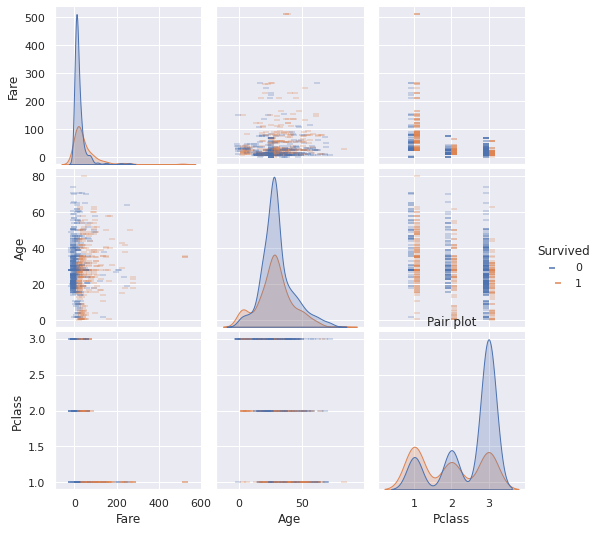

In [ ]:
sns.pairplot(titanic_data[["Fare","Age","Pclass","Survived"]],vars=["Fare","Age","Pclass"],hue='Survived',dropna=True,markers=[0,1],plot_kws={'alpha':1})
plt.title('Pair plot')



*  People who are paying Less fair died
*  People who are having age 20-40 have died


*  More people of Pclass 1 survived 
*   More people of Pclass 3 died



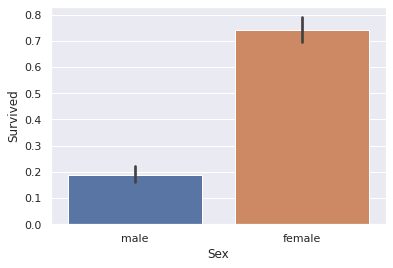

In [ ]:
sns.barplot(x='Sex',y='Survived',data=titanic_data)


Also we can see that more female survived than male

Establishing correlation between all the features using heatmap

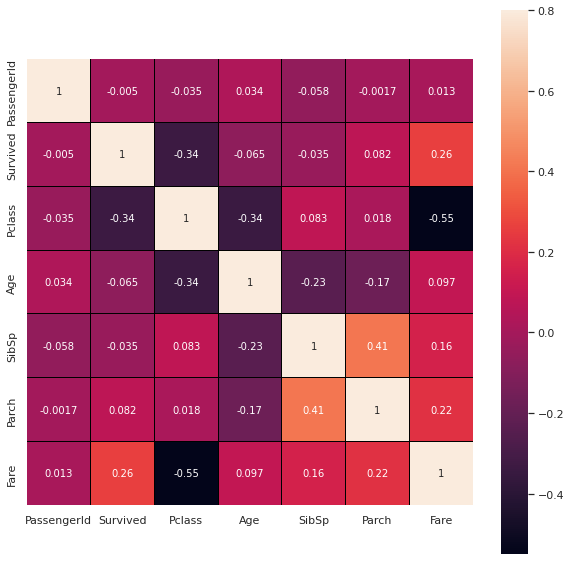

In [ ]:
corr = titanic_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=0.8,linewidth=.01,square=True,annot=True,linecolor='black')

Age and Pclass are negatively correlated with survived
Fare is also positively correlated with survived

**Decision Tree**

Preparing X and Y

---



In [ ]:
titanic=pd.get_dummies(titanic,columns=['Sex'],drop_first=True)
titanic.head()
titanic.drop('Embarked',axis=1,inplace=True)

In [ ]:
X=titanic.loc[:,titanic.columns!='Survived']
X.head()

,PassengerId,Pclass,Age,Fare,Sex_male
0,1,3,22.0,7.2500,1
1,2,1,38.0,71.2833,0
2,3,3,26.0,7.9250,0
3,4,1,35.0,53.1000,0
4,5,3,35.0,8.0500,1


In [ ]:
Y=titanic.Survived
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Splitting X and Y into training and test datasets

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=1)

In [ ]:
print(X_train.shape)
print(Y_train.shape)

(712, 5)
(712,)


In [ ]:
from sklearn import tree
model=tree.DecisionTreeClassifier(random_state=0)
model.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
import graphviz
from graphviz import Source
graph=Source(tree.export_graphviz(model,out_file=None,filled=True,rounded=True,special_characters=True,feature_names=X.columns))
graph.format='png'
graph.render('dtree_render',view=True)

'dtree_render.png'

In [ ]:
from sklearn import tree
print(tree.export_text(model))

|--- feature_4 <= 0.50
|   |--- feature_1 <= 2.50
|   |   |--- feature_2 <= 2.50
|   |   |   |--- feature_3 <= 88.78
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  88.78
|   |   |   |   |--- class: 0
|   |   |--- feature_2 >  2.50
|   |   |   |--- feature_3 <= 28.86
|   |   |   |   |--- feature_3 <= 28.23
|   |   |   |   |   |--- feature_0 <= 48.00
|   |   |   |   |   |   |--- feature_2 <= 41.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_2 >  41.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_0 >  48.00
|   |   |   |   |   |   |--- feature_0 <= 828.50
|   |   |   |   |   |   |   |--- feature_0 <= 373.00
|   |   |   |   |   |   |   |   |--- feature_0 <= 352.50
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 27.00
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 25.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- feature

[Text(126.1983173076923, 211.4, 'X[4] <= 0.5\ngini = 0.47\nsamples = 712\nvalue = [443, 269]'),
 Text(61.03125, 199.32, 'X[1] <= 2.5\ngini = 0.386\nsamples = 249\nvalue = [65, 184]'),
 Text(18.6, 187.24, 'X[2] <= 2.5\ngini = 0.096\nsamples = 139\nvalue = [7, 132]'),
 Text(12.876923076923077, 175.16, 'X[3] <= 88.775\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(10.015384615384615, 163.07999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(15.73846153846154, 163.07999999999998, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(24.323076923076922, 175.16, 'X[3] <= 28.856\ngini = 0.084\nsamples = 137\nvalue = [6, 131]'),
 Text(21.461538461538463, 163.07999999999998, 'X[3] <= 28.231\ngini = 0.198\nsamples = 54\nvalue = [6, 48]'),
 Text(18.6, 151.0, 'X[0] <= 48.0\ngini = 0.171\nsamples = 53\nvalue = [5, 48]'),
 Text(11.446153846153846, 138.92000000000002, 'X[2] <= 41.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(8.584615384615384, 126.84, 'gini = 0.0\nsamples = 1\nvalu

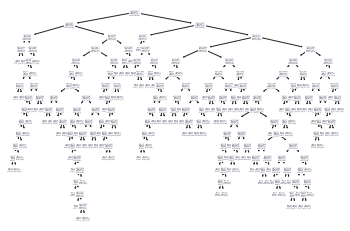

In [ ]:
from sklearn import tree
tree.plot_tree(model)

In [ ]:
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

Model Evaluation using accuracy score

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy score for test data is : ",accuracy_score(Y_test,y_pred_test))

Accuracy score for test data is :  0.7374301675977654
